In [1]:
from keras.models import load_model


In [11]:
import imageio
import matplotlib.pyplot as plt
import numpy as np

In [2]:
filename = '/Users/pavelbulochkin/banuba/face-age-gender-estimation/python-model-processing/00_model_processing/mout_gar_v4_033_1.330.h5'

In [3]:
model=load_model(filename)

/usr/local/lib/python2.7/site-packages/keras/models.py:281: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [4]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 128, 128, 3)   0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 126, 126, 6)   168         input_1[0][0]                    
____________________________________________________________________________________________________
conv2d_2 (Conv2D)                (None, 126, 126, 6)   330         conv2d_1[0][0]                   
____________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)   (None, 63, 63, 6)     0           conv2d_2[0][0]                   
___________________________________________________________________________________________

In [5]:
model.inputs

[<tf.Tensor 'input_1:0' shape=(?, 128, 128, 3) dtype=float32>]

In [6]:
model.outputs

[<tf.Tensor 'gender/Softmax:0' shape=(?, 2) dtype=float32>,
 <tf.Tensor 'age/Softmax:0' shape=(?, 10) dtype=float32>]

In [37]:
img_path_1 = '/Users/pavelbulochkin/banuba/face-age-gender-estimation/data-examples/images/imgs/frame-0001.jpg-crop.jpg'
img_path_2 = '/Users/pavelbulochkin/banuba/face-age-gender-estimation/data-examples/images/imgs/frame-0034.jpg-crop.jpg'
face_box_list = np.array([imageio.imread(item) for item in [img_path_1, img_path_2]])

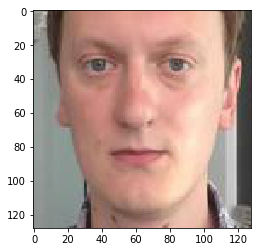

In [38]:
plt.imshow(face_box_list[0])
plt.show()

In [39]:
face_box_list_in = (face_box_list.astype(np.float32) - 127.5)/127.5

In [40]:
tmp = model.predict(face_box_list_in)

In [41]:
tmp

[array([[ 0.97182995,  0.02816996],
        [ 0.98439771,  0.01560227]], dtype=float32),
 array([[  2.79216701e-03,   4.33612242e-02,   3.08340579e-01,
           5.73300302e-01,   6.78222626e-02,   4.33260156e-03,
           4.61551936e-05,   4.60293177e-06,   5.44796954e-08,
           1.17528378e-08],
        [  4.03613871e-04,   2.21738731e-03,   3.39382082e-01,
           3.33142668e-01,   1.71519935e-01,   1.20480038e-01,
           2.66339015e-02,   6.12239633e-03,   9.14026532e-05,
           6.57701867e-06]], dtype=float32)]

In [27]:
tmp[0][0]

array([ 0.97182995,  0.02816996], dtype=float32)

In [28]:
tmp[0][1]

array([ 0.98439771,  0.01560227], dtype=float32)

In [36]:
np.argmax(tmp[1],axis=1)

array([3, 2])